## Testing how runtime scales with number of phases in the composite

In [1]:
# Import necessary packages
import json
import matplotlib.pyplot as plt
import numpy as np
import sys
import time

# Custom imports
from hashin_shtrikman_mp.core.user_input import MaterialProperty, Material, MixtureProperty, Mixture, UserInput
from hashin_shtrikman_mp.core import GeneticAlgorithm
from hashin_shtrikman_mp.core.genetic_algorithm import OptimizationParams

/Users/carlabecker/opt/anaconda3/envs/carla_mp_api/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Testing without calls to generate final dict (faster)
import json
consolidated_dict = {}
with open("test_consolidated_dict") as f:
    consolidated_dict = json.load(f)

In [3]:
# Define the number of trials
num_trials = 10

## 2 phase composite

In [4]:
# Example material matches for an n=2 phase compositie
mat_1_ids = ["mp-684591", "mp-752826", "mp-3098", "mp-3748"]
mat_2_ids = ["mp-684591", "mp-752826", "mp-3098", "mp-3748"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids}

In [5]:
# Need user input to create an HS instance
# Use same bounds for all materials
properties_mat_1 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=20, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.001, lower_bound=1e-5),
    MaterialProperty(prop='bulk_modulus', upper_bound=400, lower_bound=50),
    MaterialProperty(prop='shear_modulus', upper_bound=400, lower_bound=80),
    MaterialProperty(prop='universal_anisotropy', upper_bound=3, lower_bound=0.5),
]

# Define properties for the mixture
properties_mixture = [
    MixtureProperty(prop='elec_cond_300k_low_doping', desired_prop=9),
    MixtureProperty(prop='therm_cond_300k_low_doping', desired_prop=0.007),
    MixtureProperty(prop='bulk_modulus', desired_prop=234),
    MixtureProperty(prop='shear_modulus', desired_prop=150),
    MixtureProperty(prop='universal_anisotropy', desired_prop=1.5),
]

# Create Material & Mixture instances
mat_1 = Material(name='mat_1', properties=properties_mat_1)
mat_2 = Material(name='mat_2', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mixture': {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}}


In [6]:
# Create an OptimizationParams instance for testing
optimization = OptimizationParams.from_user_input(user_input)

# Initialize GeneticAlgorithm instance
ga = GeneticAlgorithm()

2025-01-17 15:36:51,563 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:36:51,573 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:36:51,573 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


In [7]:
# Perform Optimizaztion several times to observe variation
runtimes_2phase_optimization = []
for i in range(num_trials):
    start = time.time()
    ga_result = ga.run(user_input, gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_2phase_optimization.append(runtime)

2025-01-17 15:36:51,583 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:36:51,591 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:36:51,591 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:36:54,975 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:36:54,979 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:36:54,980 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 0: 3.391982078552246 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:36:57,822 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:36:57,825 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:36:57,826 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 1: 2.847078800201416 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:00,470 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:00,474 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:00,474 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 2: 2.6482691764831543 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:03,146 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:03,150 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:03,150 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 3: 2.675697088241577 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:05,836 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:05,840 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:05,840 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 4: 2.6898863315582275 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:08,443 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:08,446 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:08,447 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 5: 2.6065540313720703 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:11,114 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:11,117 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:11,118 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 6: 2.670865058898926 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:13,728 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:13,731 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:13,731 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 7: 2.613820791244507 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:16,317 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:16,320 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:16,321 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 8: 2.589071035385132 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0
Trial 9: 2.6835319995880127 seconds


## 3 phase composite

In [8]:
# Example material matches for an n=3 phase compositie
mat_3_ids = ["mp-684591", "mp-752826", "mp-3098", "mp-3748"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids}

In [9]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_3 = Material(name='mat_3', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [10]:
# Create an OptimizationParams instance for testing
optimization = OptimizationParams.from_user_input(user_input)

# Initialize GeneticAlgorithm instance
ga = GeneticAlgorithm()

2025-01-17 15:37:19,021 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:19,025 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:19,026 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


In [11]:
# Perform Optimizaztion several times to observe variation
runtimes_3phase_optimization = []
for i in range(num_trials):
    start = time.time()
    ga_result = ga.run(user_input, gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_3phase_optimization.append(runtime)

2025-01-17 15:37:19,033 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:19,040 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:19,040 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:22,159 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:22,162 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:22,163 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 0: 3.125284194946289 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:25,385 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:25,389 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:25,390 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 1: 3.226546287536621 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:28,452 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:28,456 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:28,457 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 2: 3.0667269229888916 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:31,657 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:31,661 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:31,661 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 3: 3.205225944519043 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:34,763 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:34,766 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:34,767 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 4: 3.105451822280884 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:37,900 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:37,904 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:37,905 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 5: 3.137331962585449 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:41,019 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:41,023 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:41,023 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 6: 3.118502140045166 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:44,198 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:44,202 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:44,202 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 7: 3.1784520149230957 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:47,284 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:47,288 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:47,289 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 8: 3.0860888957977295 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0
Trial 9: 3.2679190635681152 seconds


## 4 phase composite

In [12]:
# Example material matches for an n=3 phase compositie
mat_4_ids = ["mp-684591", "mp-752826", "mp-3098", "mp-3748"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids, 'mat4': mat_4_ids}

In [13]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_4 = Material(name='mat_4', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [14]:
# Create an OptimizationParams instance for testing
optimization = OptimizationParams.from_user_input(user_input)

# Initialize GeneticAlgorithm instance
ga = GeneticAlgorithm()

2025-01-17 15:37:50,575 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:50,580 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:50,581 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


In [15]:
# Perform Optimizaztion several times to observe variation
runtimes_4phase_optimization = []
for i in range(num_trials):
    start = time.time()
    ga_result = ga.run(user_input, gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_4phase_optimization.append(runtime)

2025-01-17 15:37:50,589 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:50,598 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:50,599 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:54,574 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:54,577 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:54,578 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 0: 3.9851326942443848 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:37:58,606 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:37:58,609 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:37:58,610 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 1: 4.032001972198486 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:38:02,529 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:02,532 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:02,532 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 2: 3.9224488735198975 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:38:06,511 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:06,514 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:06,515 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 3: 3.9820432662963867 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:38:10,668 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:10,677 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:10,678 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 4: 4.1569600105285645 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:38:15,742 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:15,747 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:15,747 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 5: 5.073750972747803 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:38:20,201 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:20,205 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:20,206 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 6: 4.459139108657837 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:38:24,207 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:24,211 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:24,211 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 7: 4.006362199783325 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:38:29,482 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:29,487 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:29,488 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 8: 5.274569988250732 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0
Trial 9: 4.781753063201904 seconds


## 5 phase composite

In [16]:
# Example material matches for an n=3 phase compositie
mat_5_ids = ["mp-684591", "mp-752826", "mp-3098", "mp-3748"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids, 'mat4': mat_4_ids, 'mat5': mat_5_ids}

In [17]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_5 = Material(name='mat_5', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [18]:
# Create an OptimizationParams instance for testing
optimization = OptimizationParams.from_user_input(user_input)

# Initialize GeneticAlgorithm instance
ga = GeneticAlgorithm()

2025-01-17 15:38:34,284 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:34,289 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:34,289 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


In [19]:
# Perform Optimizaztion several times to observe variation
runtimes_5phase_optimization = []
for i in range(num_trials):
    start = time.time()
    ga_result = ga.run(user_input, gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_5phase_optimization.append(runtime)

2025-01-17 15:38:34,298 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:34,306 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:34,307 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:38:39,327 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:39,332 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:39,333 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 0: 5.0289201736450195 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:38:44,018 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:44,023 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:44,024 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 1: 4.691472053527832 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:38:48,771 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:48,775 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:48,775 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 2: 4.752252817153931 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:38:52,884 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:52,888 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:52,888 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 3: 4.113186597824097 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:38:57,518 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:38:57,522 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:38:57,523 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 4: 4.634290933609009 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:39:03,086 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:39:03,091 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:39:03,092 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 5: 5.56768012046814 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:39:09,336 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:39:09,340 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:39:09,341 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 6: 6.2499778270721436 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:39:13,731 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:39:13,734 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:39:13,735 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 7: 4.394968748092651 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:39:18,027 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:39:18,031 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:39:18,032 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 8: 4.295711994171143 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0
Trial 9: 4.19736385345459 seconds


## 6 phase composite

In [20]:
# Example material matches for an n=3 phase compositie
mat_6_ids = ["mp-684591", "mp-752826", "mp-3098", "mp-3748"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids}

In [21]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_6 = Material(name='mat_6', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [22]:
# Create an OptimizationParams instance for testing
optimization = OptimizationParams.from_user_input(user_input)

# Initialize GeneticAlgorithm instance
ga = GeneticAlgorithm()

2025-01-17 15:39:22,263 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:39:22,274 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:39:22,276 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


In [23]:
# Perform Optimizaztion several times to observe variation
runtimes_6phase_optimization = []
for i in range(num_trials):
    start = time.time()
    ga_result = ga.run(user_input, gen_counter=False)
    end = time.time()
    runime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_6phase_optimization.append(runtime)

2025-01-17 15:39:22,294 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:39:22,304 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:39:22,305 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:39:27,502 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:39:27,506 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:39:27,507 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 0: 4.19736385345459 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:39:33,152 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:39:33,155 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:39:33,156 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 1: 4.19736385345459 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:39:37,606 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:39:37,610 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:39:37,610 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 2: 4.19736385345459 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:39:42,108 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:39:42,112 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:39:42,113 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 3: 4.19736385345459 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:39:46,608 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:39:46,613 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:39:46,614 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 4: 4.19736385345459 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:39:51,399 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:39:51,403 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:39:51,403 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 5: 4.19736385345459 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:39:56,793 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:39:56,796 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:39:56,797 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 6: 4.19736385345459 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:40:02,116 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:40:02,119 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:40:02,120 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 7: 4.19736385345459 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:40:09,141 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:40:09,144 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:40:09,145 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 8: 4.19736385345459 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0
Trial 9: 4.19736385345459 seconds


## 7 phase composite

In [24]:
# Example material matches for an n=3 phase compositie
mat_7_ids = ["mp-684591", "mp-752826", "mp-3098", "mp-3748"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids}

In [25]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_7 = Material(name='mat_7', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [26]:
# Create an OptimizationParams instance for testing
optimization = OptimizationParams.from_user_input(user_input)

# Initialize GeneticAlgorithm instance
ga = GeneticAlgorithm()

2025-01-17 15:40:14,860 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:40:14,865 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:40:14,866 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


In [27]:
# Perform Optimizaztion several times to observe variation
runtimes_7phase_optimization = []
for i in range(num_trials):
    start = time.time()
    ga_result = ga.run(user_input, gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_7phase_optimization.append(runtime)

2025-01-17 15:40:14,875 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:40:14,880 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:40:14,881 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:40:19,934 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:40:19,938 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:40:19,939 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 0: 5.059484004974365 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:40:25,613 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:40:25,617 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:40:25,618 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 1: 5.678532123565674 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:40:32,363 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:40:32,367 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:40:32,368 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 2: 6.749908208847046 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:40:39,105 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:40:39,109 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:40:39,110 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 3: 6.741919994354248 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:40:44,845 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:40:44,849 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:40:44,849 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 4: 5.739863872528076 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:40:51,406 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:40:51,409 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:40:51,410 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 5: 6.5605480670928955 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:40:57,357 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:40:57,362 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:40:57,363 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 6: 5.951064109802246 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:41:03,941 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:41:03,946 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:41:03,947 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 7: 6.583721876144409 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:41:11,486 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:41:11,490 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:41:11,491 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 8: 7.544566631317139 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0
Trial 9: 7.7692811489105225 seconds


## 8 phase composite

In [28]:
# Example material matches for an n=3 phase compositie
mat_8_ids = ["mp-684591", "mp-752826", "mp-3098", "mp-3748"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids,
                'mat7': mat_7_ids}

In [29]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_8 = Material(name='mat_8', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [30]:
# Create an OptimizationParams instance for testing
optimization = OptimizationParams.from_user_input(user_input)

# Initialize GeneticAlgorithm instance
ga = GeneticAlgorithm()

2025-01-17 15:41:19,296 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:41:19,308 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:41:19,310 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


In [31]:
# Perform Optimizaztion several times to observe variation
runtimes_8phase_optimization = []
for i in range(num_trials):
    start = time.time()
    ga_result = ga.run(user_input, gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_8phase_optimization.append(runtime)

2025-01-17 15:41:19,359 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:41:19,367 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:41:19,367 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:41:26,033 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:41:26,036 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:41:26,037 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 0: 6.674020051956177 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:41:31,392 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:41:31,396 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:41:31,397 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 1: 5.359414100646973 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:41:36,683 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:41:36,687 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:41:36,687 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 2: 5.290914058685303 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:41:42,052 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:41:42,055 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:41:42,056 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 3: 5.36880087852478 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:41:47,383 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:41:47,386 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:41:47,386 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 4: 5.330187082290649 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:41:52,805 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:41:52,809 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:41:52,809 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 5: 5.422411918640137 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:41:58,133 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:41:58,136 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:41:58,137 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 6: 5.328001022338867 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:42:03,593 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:42:03,597 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:42:03,598 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 7: 5.45943021774292 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:42:08,975 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:42:08,978 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:42:08,979 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 8: 5.381619215011597 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0
Trial 9: 7.115289926528931 seconds


## 9 phase composite

In [32]:
# Example material matches for an n=3 phase compositie
mat_9_ids = ["mp-684591", "mp-752826", "mp-3098", "mp-3748"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids,
                'mat7': mat_7_ids,
                'mat8': mat_8_ids,
                'mat9': mat_9_ids}

In [33]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_9 = Material(name='mat_9', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [34]:
# Create an OptimizationParams instance for testing
optimization = OptimizationParams.from_user_input(user_input)

# Initialize GeneticAlgorithm instance
ga = GeneticAlgorithm()

2025-01-17 15:42:16,122 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:42:16,129 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:42:16,130 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


In [35]:
# Perform Optimizaztion several times to observe variation
runtimes_9phase_optimization = []
for i in range(num_trials):
    start = time.time()
    ga_result = ga.run(user_input, gen_counter=False)
    end = time.time()
    runtime= end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_9phase_optimization.append(runtime)

2025-01-17 15:42:16,143 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:42:16,153 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:42:16,154 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:42:24,956 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:42:24,961 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:42:24,962 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 0: 8.812744855880737 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:42:33,317 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:42:33,322 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:42:33,323 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 1: 8.359509944915771 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:42:42,052 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:42:42,057 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:42:42,058 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 2: 8.735520124435425 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:42:51,173 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:42:51,178 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:42:51,179 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 3: 9.120854139328003 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:42:59,770 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:42:59,775 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:42:59,775 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 4: 8.595952987670898 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:43:08,491 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:43:08,496 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:43:08,498 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 5: 8.721787214279175 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:43:17,133 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:43:17,138 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:43:17,139 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 6: 8.641951322555542 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:43:25,701 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:43:25,705 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:43:25,706 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 7: 8.567357301712036 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:43:34,320 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:43:34,325 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:43:34,326 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 8: 8.618887186050415 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0
Trial 9: 8.500197887420654 seconds


## 10 phase composite

In [36]:
# Example material matches for an n=3 phase compositie
mat_10_ids = ["mp-684591", "mp-752826", "mp-3098", "mp-3748"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids,
                'mat7': mat_7_ids,
                'mat8': mat_8_ids,
                'mat9': mat_9_ids,
                'mat10': mat_10_ids}

In [37]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_10 = Material(name='mat_10', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9, mat_10, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9, mat_10], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [38]:
# Create an OptimizationParams instance for testing
optimization = OptimizationParams.from_user_input(user_input)

# Initialize GeneticAlgorithm instance
ga = GeneticAlgorithm()

2025-01-17 15:43:42,849 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:43:42,856 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:43:42,856 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


In [39]:
# Perform Optimizaztion several times to observe variation
runtimes_10phase_optimization = []
for i in range(num_trials):
    start = time.time()
    ga_result = ga.run(user_input, gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_10phase_optimization.append(runtime)

2025-01-17 15:43:42,866 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:43:42,872 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:43:42,873 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:43:52,293 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:43:52,298 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:43:52,299 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 0: 9.427634954452515 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:44:00,694 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:44:00,698 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:44:00,698 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 1: 8.40047001838684 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:44:08,896 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:44:08,899 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:44:08,900 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 2: 8.201546907424927 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:44:17,017 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:44:17,021 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:44:17,021 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 3: 8.120716094970703 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:44:25,196 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:44:25,201 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:44:25,202 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 4: 8.179752826690674 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:44:33,306 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:44:33,309 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:44:33,310 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 5: 8.108986854553223 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:44:41,285 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:44:41,290 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:44:41,291 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 6: 7.979737997055054 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:44:49,553 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:44:49,557 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:44:49,558 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 7: 8.267951011657715 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0


2025-01-17 15:44:57,371 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/io/inputs/data/mp_property_docs.yaml.
2025-01-17 15:44:57,375 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2025-01-17 15:44:57,376 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Trial 8: 7.817753791809082 seconds
material: mat_1, category: carrier-transport, property: 20.0
material: mat_1, category: carrier-transport, property: 0.001
material: mat_1, category: elastic, property: 400.0
Trial 9: 8.917567014694214 seconds


## Compare runtimes

In [40]:
runtimes = np.array([runtimes_2phase_optimization, 
                     runtimes_3phase_optimization, 
                     runtimes_4phase_optimization, 
                     runtimes_5phase_optimization, 
                     runtimes_6phase_optimization, 
                     runtimes_7phase_optimization, 
                     runtimes_8phase_optimization, 
                     runtimes_9phase_optimization,
                     runtimes_10phase_optimization])
phases = np.arange(len(runtimes)) + 2

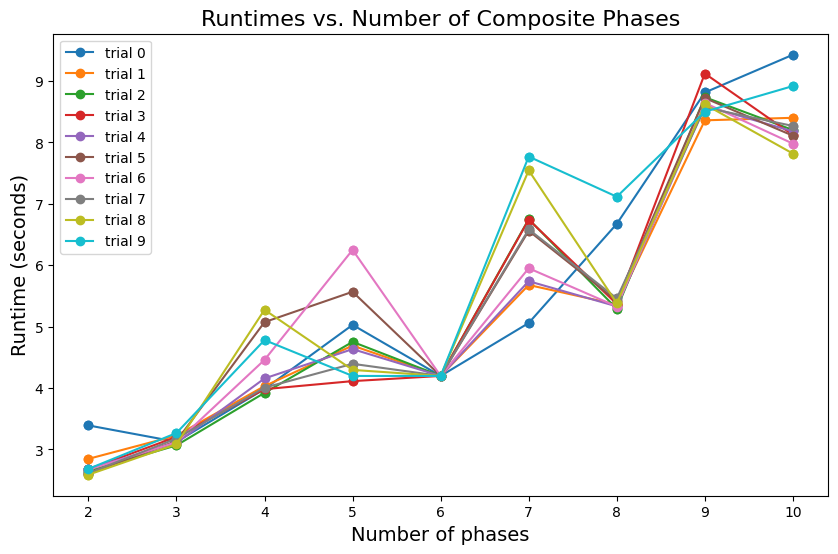

In [41]:
# Plot
plt.figure(figsize=(10, 6))

for i in range(num_trials):

    plt.plot(phases, runtimes[:, i], marker='o', linestyle='-', label=f'trial {i}')
    plt.scatter(phases, runtimes[:, i])

plt.xlabel('Number of phases', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)
plt.title('Runtimes vs. Number of Composite Phases', fontsize=16)
plt.legend()

plt.show()

In [42]:
# Statistics
min_runtime = np.min(runtimes)
max_runtime = np.max(runtimes)
avg_runtime = np.mean(runtimes)
med_runtime = np.median(runtimes)

print(f'Min runtime: {min_runtime}')
print(f'Max runtime: {max_runtime}')
print(f'Average runtime: {avg_runtime}')
print(f'Median runtime: {med_runtime}')

Min runtime: 2.589071035385132
Max runtime: 9.427634954452515
Average runtime: 5.374597448772854
Median runtime: 4.905336618423462
